In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import PMTPosition as PMT

50.0 80.0 59.0
CAMs positions:
 [[25.         66.66666667]
 [25.         40.        ]
 [25.         13.33333333]]
PMTs positions:
 [[12.5        73.33333333]
 [37.5        73.33333333]
 [12.5        53.33333333]
 [37.5        53.33333333]]


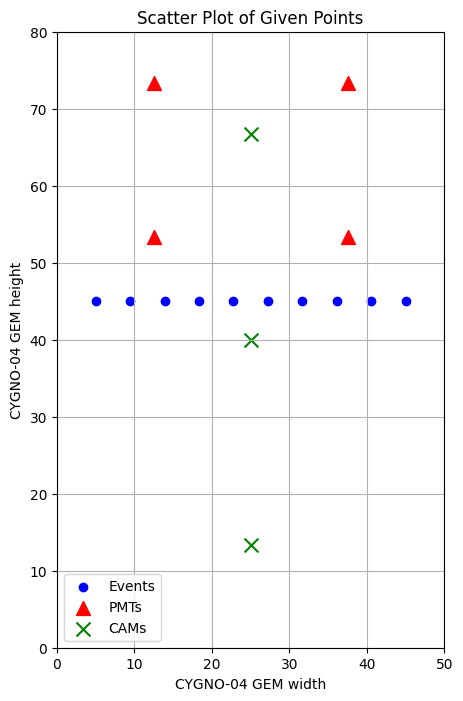

In [7]:
GEM_width,  GEM_height = PMT.GetGEMsDim()
GEM_z_dist = PMT.GetGEMsZ()
print(GEM_width,  GEM_height, GEM_z_dist)

n_events = 10
pos = PMT.GenEventPosition(x_offset = 0.0, size = n_events, distribution = 'fixedY', x_start = 5, x_end = 45,  y_offset = 45)

####  Plotting PMTs

## Full scheme
# PMT_pos = np.array([[GEM_width/2- GEM_width/2/2, GEM_height/3*3 - GEM_height/3/4], [GEM_width/2+ GEM_width/2/2, GEM_height/3*3 - GEM_height/3/4],
#                     [GEM_width/2- GEM_width/2/2, GEM_height/3*2],                  [GEM_width/2+ GEM_width/2/2, GEM_height/3*2],
#                     [GEM_width/2- GEM_width/2/2, GEM_height/3*1],                  [GEM_width/2+ GEM_width/2/2, GEM_height/3*1],
#                     [GEM_width/2- GEM_width/2/2, GEM_height/3*0 + GEM_height/3/4], [GEM_width/2+ GEM_width/2/2, GEM_height/3*0 + GEM_height/3/4]])

# Which one is the camera configuration?!
# CAM_pos = np.array([[GEM_width/2, GEM_height/4*1] ,
#                     [GEM_width/2, GEM_height/4*2] ,
#                     [GEM_width/2, GEM_height/4*3]])

CAM_pos = np.array([[GEM_width/2, GEM_height/3*3 - GEM_height/3/2] ,
                    [GEM_width/2, GEM_height/3*2 - GEM_height/3/2] ,
                    [GEM_width/2, GEM_height/3*1 - GEM_height/3/2 ]])

## Reduced scheme scheme
PMT_pos = np.array([[GEM_width/2- GEM_width/2/2, GEM_height/3*3 - GEM_height/3/4], [GEM_width/2+ GEM_width/2/2, GEM_height/3*3 - GEM_height/3/4],
                    [GEM_width/2- GEM_width/2/2, GEM_height/3*2],                  [GEM_width/2+ GEM_width/2/2, GEM_height/3*2]])

# CAM_pos = np.array([[GEM_width/2,GEM_height/3*3 - GEM_height/3/2]])

print("CAMs positions:\n {}".format(CAM_pos))
print("PMTs positions:\n {}".format(PMT_pos))


plt.figure(figsize=(5, 8))
plt.scatter(pos[:, 0], pos[:, 1], color='blue', label='Events')
plt.scatter(PMT_pos[:, 0], PMT_pos[:, 1], color='red', label='PMTs', marker='^', s=100)
plt.scatter(CAM_pos[:, 0], CAM_pos[:, 1], color='green', label='CAMs', marker='x', s=100)

# Adding labels and title
plt.xlabel('CYGNO-04 GEM width')
plt.ylabel('CYGNO-04 GEM height')
plt.xlim(0,GEM_width)
plt.ylim(0,GEM_height)
plt.title('Scatter Plot of Given Points')
plt.legend()
plt.grid(True)

# for i in range(8):
    # plt.text(PMT_pos[i, 0], PMT_pos[i, 1], "PMT #{}".format(i+1), fontsize=12, ha='right', va='bottom')
# for i in range(3):
    # plt.text(CAM_pos[i, 0], CAM_pos[i, 1], "CAM #{}".format(i+1), fontsize=12, ha='right', va='bottom')

plt.show()

[ 5.          9.44444444 13.88888889 18.33333333 22.77777778 27.22222222
 31.66666667 36.11111111 40.55555556 45.        ]


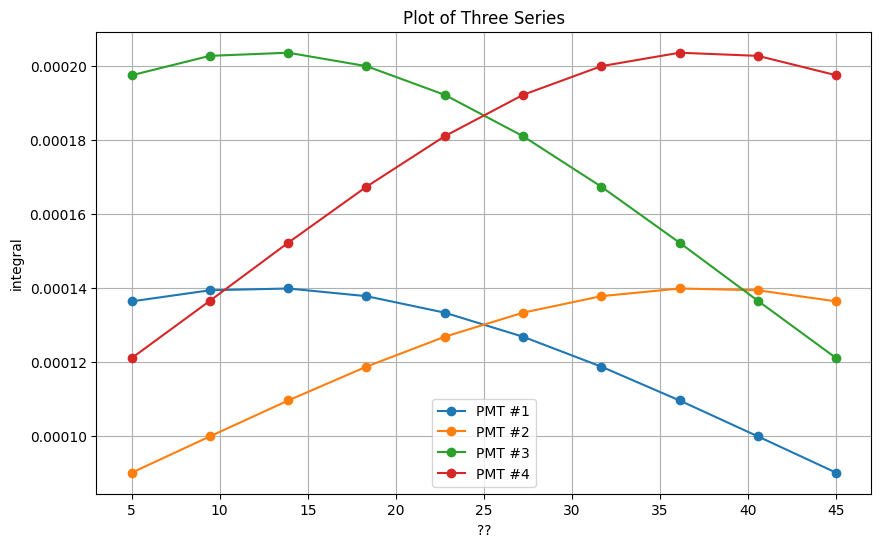

In [3]:
# PMT_pos = np.array([[20, 40], [60, 40], [60,10], [20,10]])
n_PMTS = len(PMT_pos)
R_all   = PMT.GetR_All(PMT_pos = PMT_pos, Event_pos = pos)

ints = PMT.GetIntegrals(R_all, energy = 5.9, LY = 8500.0)

series_data = []

for i in range(n_PMTS):

    n_series = ints[:,i]
    series_data.append(n_series)

x_values = pos[:,0]
print(x_values)

plt.figure(figsize=(10, 6))
for pmt_i in range(len(series_data)):
    plt.plot(x_values, series_data[pmt_i], marker='o', label='PMT #{}'.format(pmt_i+1))

# Adding labels, title, and legend
plt.xlabel('??')
plt.ylabel('integral')
plt.title('Plot of Three Series')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [4]:
## Create input for BAT
## Run it to see how the positions are discovered (btw, should be perfect match)

## decide how to evaluate best positions

## consider "minimum triggerable" (this is why the correct amplitudes were considered)
## can even to a plot of "non-trigerable event positions" in the X-Y map


print(series_data)


PMT.create_bat_input(n_evts = n_events, ints = ints)

[array([1.36318088e-04, 1.39313635e-04, 1.39795630e-04, 1.37724861e-04,
       1.33268070e-04, 1.26768924e-04, 1.18691574e-04, 1.09552242e-04,
       9.98549933e-05, 9.00433144e-05]), array([9.00433144e-05, 9.98549933e-05, 1.09552242e-04, 1.18691574e-04,
       1.26768924e-04, 1.33268070e-04, 1.37724861e-04, 1.39795630e-04,
       1.39313635e-04, 1.36318088e-04]), array([0.00019739, 0.00020262, 0.00020347, 0.00019984, 0.00019209,
       0.00018093, 0.00016728, 0.00015216, 0.00013647, 0.00012099]), array([0.00012099, 0.00013647, 0.00015216, 0.00016728, 0.00018093,
       0.00019209, 0.00019984, 0.00020347, 0.00020262, 0.00019739])]


NameError: name 'vtg_to_nC' is not defined